## Using NumPy with Raster data

In [1]:
#Import numpy
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Using GDAL to import TIFs as NumPy arrays
GDAL is a spatial data analysis engine, an open source alternative to using ESRI's proprietary ArcPy package. If you are curious, the University of Helsinki has a nice lesson on analyzing raster data with GDAL and Numpy available [here](https://automating-gis-processes.github.io/2016/Lesson7-overview.html). 

Below we navigate through a few new steps using GDAL and NumPy, but also lean on many of the concepts we've covered in our NumPy lessons.

In [2]:
## This code cell imports the GDAL package and uses it ot import a raster of 
## precipitation data for Washington state. It then converts the GDAL dataset 
## into a NumPy array for us to play with

#Create the output TIF object and set its properties
import gdal

#Get projection info from the input raster
ds = gdal.Open('../data/prism_precipitation_july_climatology.tif')
print(f'ds is a {type(ds)} object')

#Convert to a NumPy array
arr_precip = np.array(ds.GetRasterBand(1).ReadAsArray())
print(f'arr_precip is a {type(arr_precip)} object')

ds is a <class 'osgeo.gdal.Dataset'> object
arr_precip is a <class 'numpy.ndarray'> object


Now that we have a NumPy array, we can explore the dataset.

In [3]:
#1. Display the shape of the array
arr_precip.shape

(177, 353)

In [4]:
#2. Display the data type of the values in the array
arr_precip.dtype

dtype('float32')

In [5]:
#3. What is the minimum value of this array
arr_precip.min()

-9999.0

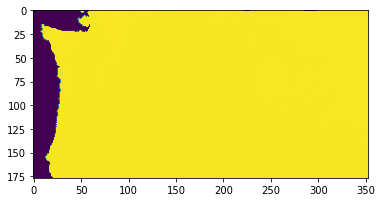

In [6]:
#4. Plot the array
plt.imshow(arr_precip);

### Masking NoData values
Values of -9999 are actually NoData values. The statement below creates a "masked array" where these values are masked out. 

In [7]:
#Mask out -9999 values
arr_precip_masked = np.ma.masked_equal(arr_precip, -9999)

In [10]:
#5. Now, what is the minimum value, the mean value, the max value
arr_precip_masked.min(), arr_precip_masked.mean(), arr_precip_masked.max()

(3.45876, 22.06197560596644, 147.53952)

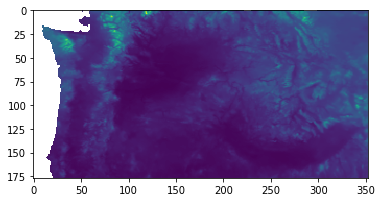

In [12]:
#6. Display the masked array
plt.imshow(arr_precip_masked);

#### Subset the data, then compute statistics and histogram
Here, we'll subset the Olympic Peninsula, defined as the pixels in rows zero to 50 and columns from zero to 50. And then we'll examine data in just those pixels.

In [21]:
#7. Subset rows 0 to 100 & columns 0 to 100
arr_OP = arr_precip_masked[:100,:100]

In [22]:
#8. Flatten the sample and create a histogram
arr_OP_flat = arr_OP.flatten()
arr_OP.shape , arr_OP_flat.shape

((100, 100), (10000,))

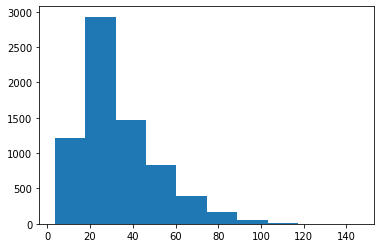

In [25]:
#9. Plot a histogram of the flattened array
plt.hist(arr_OP_flat);

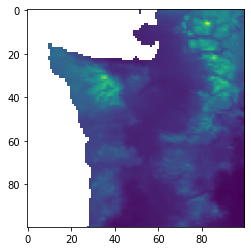

In [26]:
#10. Plot the array of the Olypmic Peninsula
plt.imshow(arr_OP);

What is the mean value of data in the Olympic peninsula?

In [30]:
#11. Report the mean value of the array
meanVal =arr_OP.mean() 
meanVal

32.60973282442748

**Challenge**: Create a plot showing values above the mean (as we did the plot showing elevation above a value...).

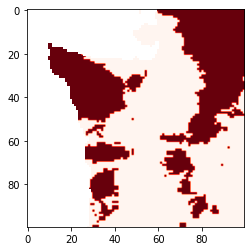

In [31]:
#12. Create a plot showing values above the mean
arr_OP_mask= arr_OP >32.60973282442748
plt.imshow(arr_OP_mask, cmap='Reds');